In [ ]:
#Installing necessary libraries

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing all warnings
warnings.filterwarnings('ignore')



In [ ]:
#Importing HIV Dataset to jupyter notebook
csv_path1 = r"C:\Users\ACHI\Downloads\CEMA\HIV data 2000-2023.csv"



In [ ]:
#Reading HIV Dataset which is csv path 1
# Read the CSV
df1 = pd.read_csv(csv_path1, encoding='latin1')

In [ ]:
#checking the structure of HIV Dataset
df1.head(3)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2023,320 000 [280 000 - 380 000]
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2022,320 000 [280 000 - 380 000]
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,320 000 [280 000 - 380 000]


In [ ]:
#checking for the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IndicatorCode        1552 non-null   object
 1   Indicator            1552 non-null   object
 2   ValueType            1552 non-null   object
 3   ParentLocationCode   1552 non-null   object
 4   ParentLocation       1552 non-null   object
 5   Location type        1552 non-null   object
 6   SpatialDimValueCode  1552 non-null   object
 7   Location             1552 non-null   object
 8   Period type          1552 non-null   object
 9   Period               1552 non-null   int64 
 10  Value                1552 non-null   object
dtypes: int64(1), object(10)
memory usage: 133.5+ KB


In [ ]:
#checking for null values
df1.isnull().sum() #no null values in HIV dataset

IndicatorCode          0
Indicator              0
ValueType              0
ParentLocationCode     0
ParentLocation         0
Location type          0
SpatialDimValueCode    0
Location               0
Period type            0
Period                 0
Value                  0
dtype: int64

In [ ]:
#checking for duplicates in the dataset

# Check for duplicate rows
duplicate_rows = df1[df1.duplicated()]
print(duplicate_rows)  #the empty dataframe shows no duplicates exist in the data


Empty DataFrame
Columns: [IndicatorCode, Indicator, ValueType, ParentLocationCode, ParentLocation, Location type, SpatialDimValueCode, Location, Period type, Period, Value]
Index: []


In [ ]:
import re
import pandas as pd

# Function to extract the mean value from the range in 'Value'
def extract_mean(value):
    # Regex to capture the numbers in the range (e.g., 320000 [280000 - 380000])
    match = re.search(r'(\d[\d\s]*)\s*\[\s*(\d+)\s*-\s*(\d+)\s*\]', value)
    if match:
        lower = int(match.group(2).replace(' ', ''))  # Remove spaces and convert to integer
        upper = int(match.group(3).replace(' ', ''))  # Remove spaces and convert to integer
        return (lower + upper) / 2  # Return the mean of the range
    return None  # Return None if the pattern doesn't match

# Applying the extraction function to the 'Value' column
df1['Value'] = df1['Value'].apply(extract_mean)

# Converting 'Value' to numeric, forcing errors to NaN (for missing or invalid data)
df1['Value'] = pd.to_numeric(df1['Value'], errors='coerce')

# Checking the first few rows to see the result
print(df1.head())


    IndicatorCode                                          Indicator  \
0  HIV_0000000001  Estimated number of people (all ages) living w...   
1  HIV_0000000001  Estimated number of people (all ages) living w...   
2  HIV_0000000001  Estimated number of people (all ages) living w...   
3  HIV_0000000001  Estimated number of people (all ages) living w...   
4  HIV_0000000001  Estimated number of people (all ages) living w...   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AFR         Africa       Country   
1   numeric                AFR         Africa       Country   
2   numeric                AFR         Africa       Country   
3   numeric                AFR         Africa       Country   
4   numeric                AFR         Africa       Country   

  SpatialDimValueCode Location Period type  Period  Value  
0                 AGO   Angola        Year    2023    NaN  
1                 AGO   Angola        Year    2022    NaN  
2       

In [ ]:
print(df1['Value'].unique())

[  nan 4100. 3950. 3800. 3650. 2850. 2200. 1850. 1500. 5700. 2400. 4500.
 6750. 6700. 7450. 7800. 3850. 4150. 4200. 4250. 4400. 3600. 3550. 3400.
 2900. 1350. 2100. 2150. 2000. 1750. 1450. 9000. 5850. 3450. 4350. 7200.
 8100. 4800. 7400. 7250. 7100. 6900. 6000. 5150. 4550. 3300. 7050. 5000.
 1970. 1800. 1650.  840. 6400. 1200. 2950. 2450. 2050. 1035.  620.  605.
 1215. 1005.  850.  750. 2750. 2700. 2550. 2350. 1300.  800. 6600. 6200.
 5050. 4300. 1015. 2650. 1250. 1040.  600.  835.  755.  675. 8250. 8400.
 8700. 8600.  745.  615. 6100. 4650. 3200. 2025. 1940. 1400. 1065.  700.
 5950. 5550. 5200.  580. 8050. 7000. 4050. 3350. 1950. 8950. 3900. 3050.
 6350. 6150. 5800. 4600. 7300. 7350. 6800. 8650. 7850.  865. 7700. 1700.
 1150. 8500. 7900. 3150. 1900. 4450. 1210. 3700. 3500. 1550. 1600. 1055.
 6850. 5400.  645.  935.  815.  770. 3750. 1010.  930.  925.  915.  660.
 5900. 2600. 6300. 1100. 1245. 1185. 1175.  965.  820.  635. 4700. 1090.
  895.  640. 3250. 1370.  760. 5650.  655. 3000. 11

In [ ]:
print(df1['Value'].dtype)

float64


In [ ]:
#dropping the NAN Values for the HIV Dataset

df1.dropna(subset=['Value'], inplace=True)

In [ ]:

#checking if the nan values have been dropped
print(df1['Value'].unique()) #the dataset is now clean and ready for further analysis

[4100. 3950. 3800. 3650. 2850. 2200. 1850. 1500. 5700. 2400. 4500. 6750.
 6700. 7450. 7800. 3850. 4150. 4200. 4250. 4400. 3600. 3550. 3400. 2900.
 1350. 2100. 2150. 2000. 1750. 1450. 9000. 5850. 3450. 4350. 7200. 8100.
 4800. 7400. 7250. 7100. 6900. 6000. 5150. 4550. 3300. 7050. 5000. 1970.
 1800. 1650.  840. 6400. 1200. 2950. 2450. 2050. 1035.  620.  605. 1215.
 1005.  850.  750. 2750. 2700. 2550. 2350. 1300.  800. 6600. 6200. 5050.
 4300. 1015. 2650. 1250. 1040.  600.  835.  755.  675. 8250. 8400. 8700.
 8600.  745.  615. 6100. 4650. 3200. 2025. 1940. 1400. 1065.  700. 5950.
 5550. 5200.  580. 8050. 7000. 4050. 3350. 1950. 8950. 3900. 3050. 6350.
 6150. 5800. 4600. 7300. 7350. 6800. 8650. 7850.  865. 7700. 1700. 1150.
 8500. 7900. 3150. 1900. 4450. 1210. 3700. 3500. 1550. 1600. 1055. 6850.
 5400.  645.  935.  815.  770. 3750. 1010.  930.  925.  915.  660. 5900.
 2600. 6300. 1100. 1245. 1185. 1175.  965.  820.  635. 4700. 1090.  895.
  640. 3250. 1370.  760. 5650.  655. 3000. 1135. 75

QUESTION ONE PART ONE

In [ ]:
#1.Calculating total global burden and finding top contributing countries
# Calculating the total global burden
total_global_burden = df1['Value'].sum()

# Calculating the threshold for 75% of the global burden
threshold = total_global_burden * 0.75

# Grouping by country and getting the sum of 'Value' for each country
country_burden = df1.groupby('Location')['Value'].sum()

# Sorting countries by burden and getting the countries contributing to 75% of the global burden
top_countries = country_burden[country_burden.cumsum() <= threshold]

# Filterring the main dataframe to only include these top countries
df_top_countries = df1[df1['Location'].isin(top_countries.index)]





In [ ]:
display(df_top_countries.head(3))  #the dataframe shows the countries that contribute to 75% of the global HIV burden.We use the dataframe to create a visual that shows the trend of HIV Cases in those countries


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value
88,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CPV,Cabo Verde,Year,2023,4100.0
89,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CPV,Cabo Verde,Year,2022,3950.0
90,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CPV,Cabo Verde,Year,2021,3800.0


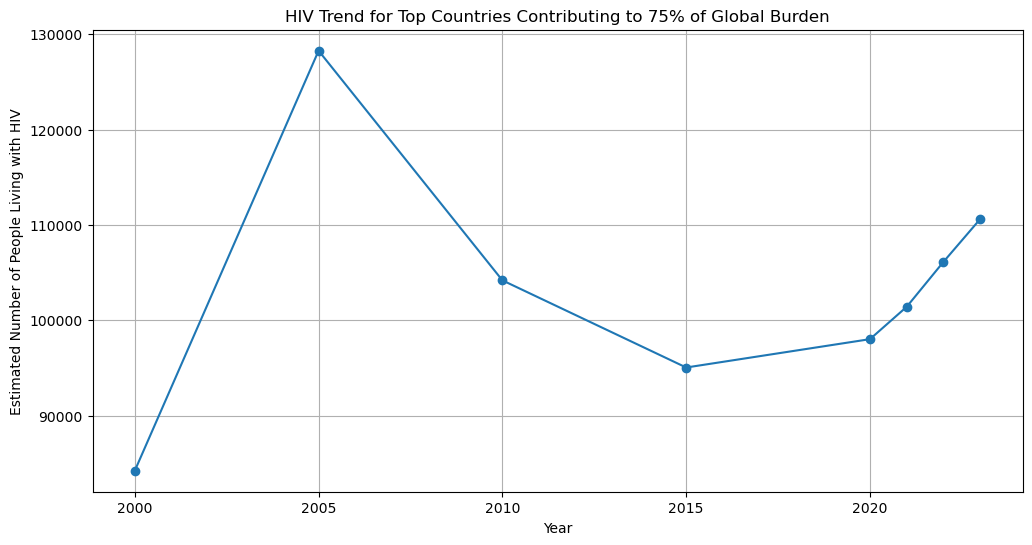

In [ ]:
#2. Creating a line chart visual for the HIV Trends cases in the countries contributing to 75% of the global burden

import matplotlib.pyplot as plt

# Plotting global HIV trend for the top contributing countries
plt.figure(figsize=(12, 6))

# Grouping by period (year) and sum the 'Value' for the top countries
global_trend = df_top_countries.groupby('Period')['Value'].sum()

plt.plot(global_trend.index, global_trend, marker='o')
plt.title('HIV Trend for Top Countries Contributing to 75% of Global Burden')
plt.xlabel('Year')
plt.ylabel('Estimated Number of People Living with HIV')
plt.grid(True)
plt.show()


The analysis shows is done in an interval of 5 years each where the estimated number of people living with HIV increased from 2000-2005,
and then dropped significantly from 2005-2010, and also dropped again from 2010-2015, however, an increasing trend started again in 2015-2020, and the
charts shows an increasing trend since 2020 which is alarming and calls for faster actions on spreading awareness on HIV_Virus.

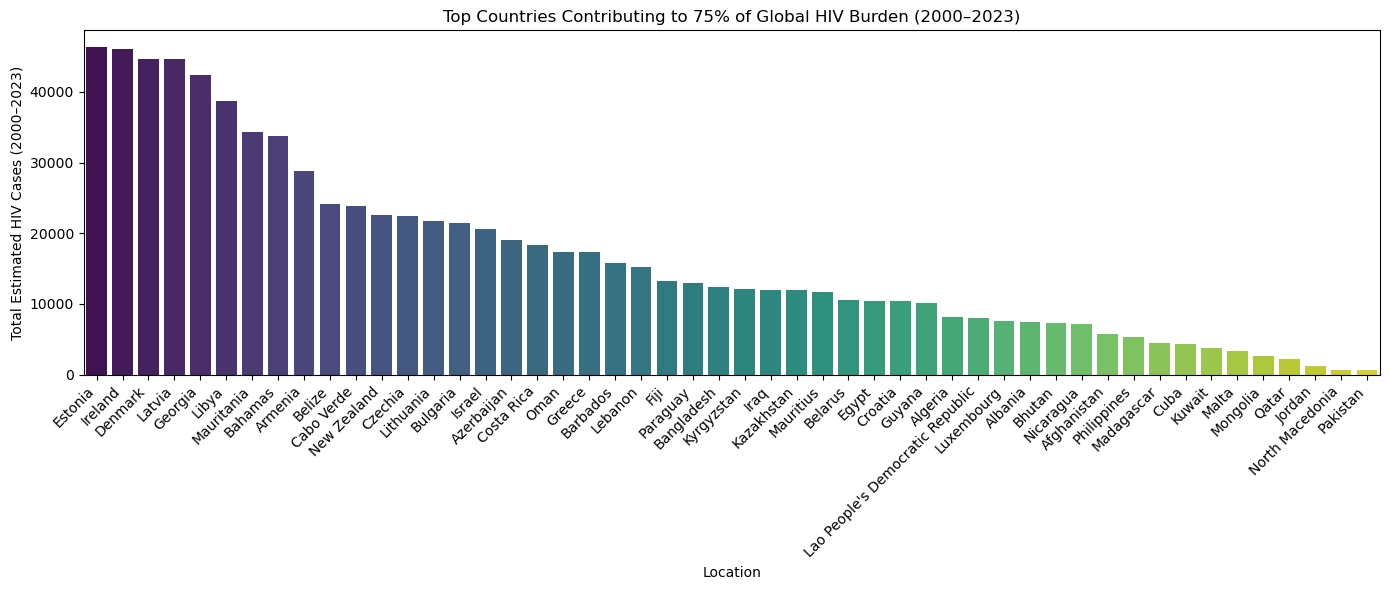

In [ ]:
#3 creating a bar chart visual showing cumulative contribution of top countries to HIV Burden from 2000-2023
import warnings
warnings.filterwarnings('ignore')

# Recalculating the total burden per country (within top contributors)
top_country_totals = df_top_countries.groupby('Location')['Value'].sum().sort_values(ascending=False)

# Plotting bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=top_country_totals.index, y=top_country_totals.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Estimated HIV Cases (2000–2023)')
plt.title('Top Countries Contributing to 75% of Global HIV Burden (2000–2023)')
plt.tight_layout()
plt.show()


The countries in the European continent are contributing the highest 75% global burden caused by HIV infections. It is important to analyze
the causes behind such large numbers in the countries showing the highest bars.

<Figure size 1200x600 with 0 Axes>

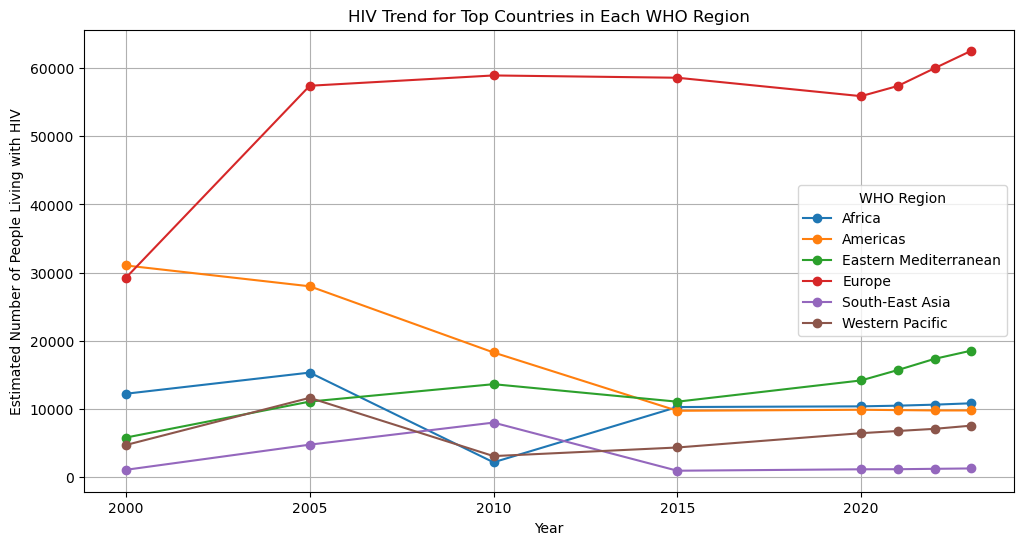

In [ ]:
#4 Plotting top trends for those top contributing countries within each WHO Region

# Plotting regional HIV trends for the top contributing countries
plt.figure(figsize=(12, 6))

# Grouping by period (year) and region, and sum the 'Value' for the top countries
regional_trend = df_top_countries.groupby(['ParentLocation', 'Period'])['Value'].sum().unstack(level=0)

regional_trend.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('HIV Trend for Top Countries in Each WHO Region')
plt.xlabel('Year')
plt.ylabel('Estimated Number of People Living with HIV')
plt.grid(True)
plt.legend(title='WHO Region')
plt.show()


The line chart upholds the analysis above from the bar chart as it shows the Europe line chart with the highest HIV trend among the WHO region.

QUESTION ONE PART TWO: Merging multidimensional - poverty dataset with HIV dataset

In [ ]:
#importing the multidimensional-poverty dataset

df2=pd.read_excel(r"C:\Users\ACHI\Downloads\CEMA\multidimensional_poverty.xlsx")

In [ ]:
##checking the general structure of the dataset

df2.head(3)

,Region,Country code,Economy,Reporting year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Unnamed: 14,Multidimensional poverty headcount ratio (%)
0,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
2,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573


In [ ]:
#checking the columns for the multidimensional poverty dataset

df2.columns

Index(['Region', 'Country code', 'Economy', 'Reporting year', 'Survey name',
       'Survey year', 'Survey coverage', 'Welfare type',
       'Survey comparability', 'Monetary (%)', 'Educational attainment (%)',
       'Educational enrollment (%)', 'Electricity (%)', 'Sanitation (%)',
       'Unnamed: 14', 'Multidimensional poverty headcount ratio (%)'],
      dtype='object')

In [ ]:
# Renaming the necessary columns to match the HIV dataset for merging purposes
# Renaming selected columns
df2 = df2.rename(columns={
    'Economy': 'Location',
    'Reporting year': 'Period',
    'Country code': 'SpatialDimValueCode',
    'Unnamed: 14': 'Drinking water (%)'
})


In [ ]:
#checking the new structure pf df2

df2.head(3)

,Region,SpatialDimValueCode,Location,Period,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),Multidimensional poverty headcount ratio (%)
0,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
2,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573


In [ ]:
#merging the two datasets for further analysis

# Merging on common columns
merged_df = pd.merge(df1, df2, on=['Location', 'Period', 'SpatialDimValueCode'])


In [ ]:
#checking on the outlook of the merged df
merged_df.head(3)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),Multidimensional poverty headcount ratio (%)
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AMR,Americas,Country,CRI,Costa Rica,Year,2010,...,N,i,3,1.242194,3.650702,0.452292,0.261438,1.55786,0.252125,1.320344
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AMR,Americas,Country,SUR,Suriname,Year,2022,...,N,c,1,1.104312,7.03216,0.874065,0.315518,5.599063,2.421072,2.129987
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,EMR,Eastern Mediterranean,Country,TUN,Tunisia,Year,2010,...,N,c,2,0.254945,6.50185,1.307041,0.18803,0.613286,1.606651,0.411305


In [ ]:
#printing the new columns after merging
merged_df.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'Value', 'Region', 'Survey name',
       'Survey year', 'Survey coverage', 'Welfare type',
       'Survey comparability', 'Monetary (%)', 'Educational attainment (%)',
       'Educational enrollment (%)', 'Electricity (%)', 'Sanitation (%)',
       'Drinking water (%)', 'Multidimensional poverty headcount ratio (%)'],
      dtype='object')

In [ ]:
#checking for the datatype of merged df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   IndicatorCode                                 9 non-null      object 
 1   Indicator                                     9 non-null      object 
 2   ValueType                                     9 non-null      object 
 3   ParentLocationCode                            9 non-null      object 
 4   ParentLocation                                9 non-null      object 
 5   Location type                                 9 non-null      object 
 6   SpatialDimValueCode                           9 non-null      object 
 7   Location                                      9 non-null      object 
 8   Period type                                   9 non-null      object 
 9   Period                                        9 non-null      int64  

In [ ]:
#removing data inconsistencies in merged df
cols_to_convert = [
    'Educational attainment (%)',
    'Educational enrollment (%)',
    'Electricity (%)',
    'Sanitation (%)',
    'Drinking water (%)'
]

for col in cols_to_convert:
    merged_df[col] = merged_df[col].astype(str).str.replace('%', '').str.strip()
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')



In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   IndicatorCode                                 9 non-null      object 
 1   Indicator                                     9 non-null      object 
 2   ValueType                                     9 non-null      object 
 3   ParentLocationCode                            9 non-null      object 
 4   ParentLocation                                9 non-null      object 
 5   Location type                                 9 non-null      object 
 6   SpatialDimValueCode                           9 non-null      object 
 7   Location                                      9 non-null      object 
 8   Period type                                   9 non-null      object 
 9   Period                                        9 non-null      int64  

In [ ]:
#dropping unnecessary columns before analyzing relationships
merged_df.drop(columns=[
    'IndicatorCode', 'ValueType', 'ParentLocationCode',
    'Location type', 'Period type', 'Survey name',
    'Survey coverage', 'Welfare type', 'Survey comparability'
], inplace=True)


In [ ]:
#checking on the columns after dropping the unnecessary ones
merged_df.columns

Index(['Indicator', 'ParentLocation', 'SpatialDimValueCode', 'Location',
       'Period', 'Value', 'Region', 'Survey year', 'Monetary (%)',
       'Educational attainment (%)', 'Educational enrollment (%)',
       'Electricity (%)', 'Sanitation (%)', 'Drinking water (%)',
       'Multidimensional poverty headcount ratio (%)'],
      dtype='object')

In [ ]:
#checking for null values
merged_df.isnull().sum()

Indicator                                       0
ParentLocation                                  0
SpatialDimValueCode                             0
Location                                        0
Period                                          0
Value                                           0
Region                                          0
Survey year                                     0
Monetary (%)                                    0
Educational attainment (%)                      0
Educational enrollment (%)                      1
Electricity (%)                                 0
Sanitation (%)                                  1
Drinking water (%)                              1
Multidimensional poverty headcount ratio (%)    0
dtype: int64

In [ ]:
#dropping the dictated nulls
# Drop rows with any null values
merged_df.dropna(inplace=True)


In [ ]:
#dropping duplicated values if any
# Drop duplicate rows
merged_df.drop_duplicates(inplace=True)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 8
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Indicator                                     7 non-null      object 
 1   ParentLocation                                7 non-null      object 
 2   SpatialDimValueCode                           7 non-null      object 
 3   Location                                      7 non-null      object 
 4   Period                                        7 non-null      int64  
 5   Value                                         7 non-null      float64
 6   Region                                        7 non-null      object 
 7   Survey year                                   7 non-null      int64  
 8   Monetary (%)                                  7 non-null      float64
 9   Educational attainment (%)                    7 non-null      float64
 10 

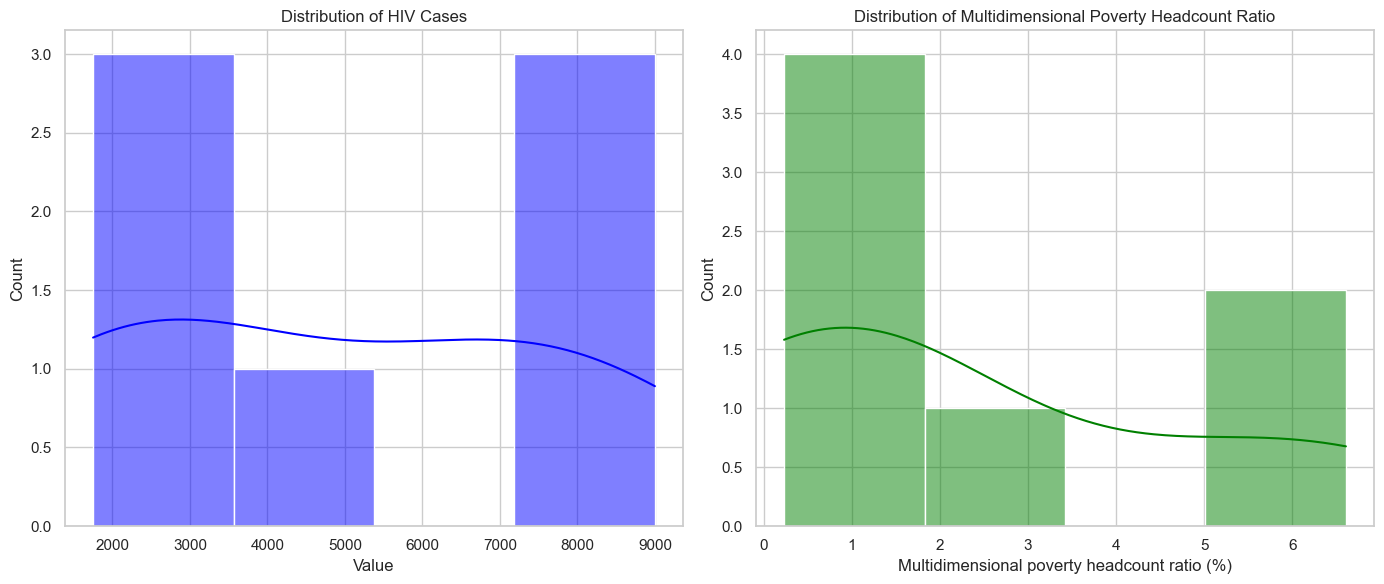

In [ ]:
#we then proceed to analyze the relationship between living with HIV and multidimensional poverty and the factors that contribute to that ratio

#we first visualize the distrivution of HIV cases and multidimensional poverty



# Set plot style
sns.set(style="whitegrid")

# Plot distribution of HIV cases (Value) and Multidimensional poverty headcount ratio
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for HIV cases
sns.histplot(merged_df['Value'], kde=True, color='blue', ax=ax[0])
ax[0].set_title('Distribution of HIV Cases')

# Plot for Multidimensional poverty headcount ratio
sns.histplot(merged_df['Multidimensional poverty headcount ratio (%)'], kde=True, color='green', ax=ax[1])
ax[1].set_title('Distribution of Multidimensional Poverty Headcount Ratio')

plt.tight_layout()
plt.show()


The left plot distribution is bimodal which gives the insight that there are two distinct clusters.
It,therefore, implies that some areas are heavily affected while others have much lower counts

The right plot distribution is right-skewed. The insight implies that most of the countries in the distribution are relatively poor
but a small number experiences higher poverty levels than the rest

We, therefore, make use of these insights to generate a scatter plot and caalculate correlation coefficients to further explore the relationships identified

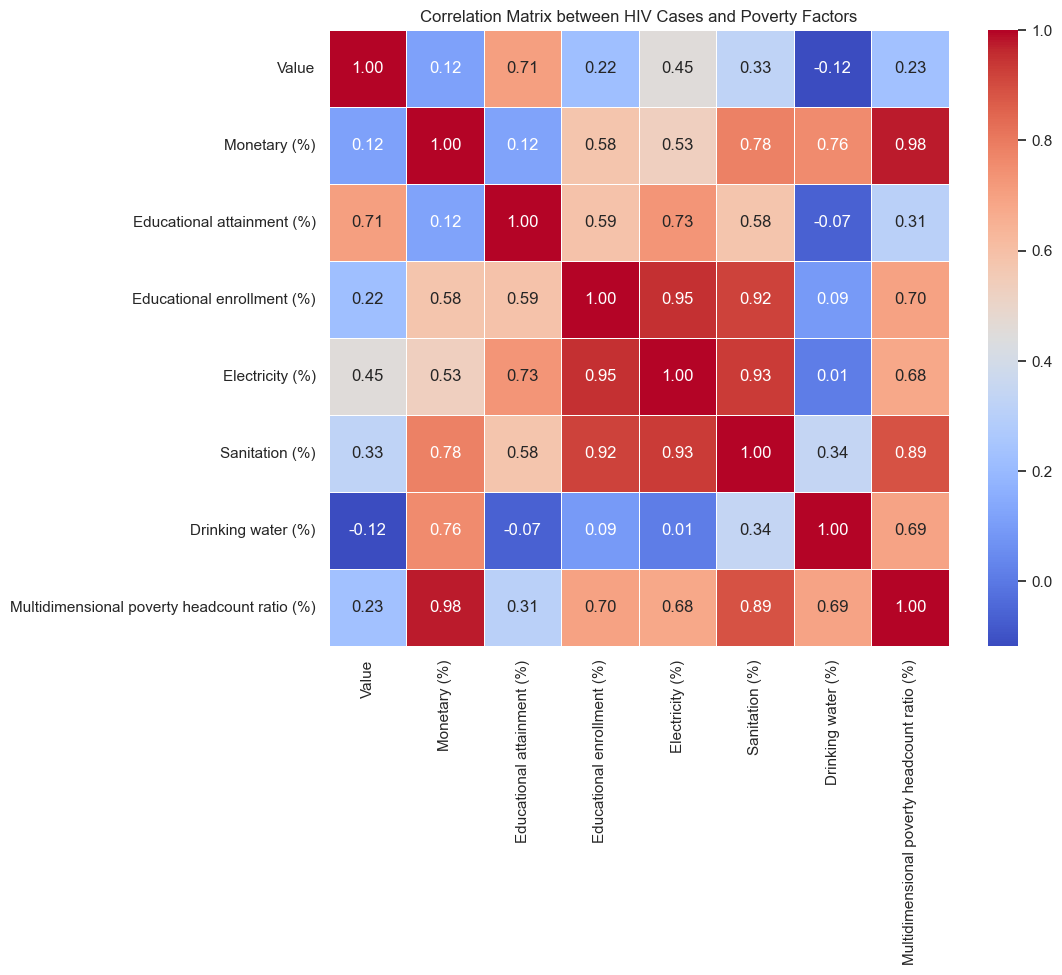

In [ ]:
#correlation matrix to further explore the relationship
# Selecting the relevant columns for correlation (HIV and poverty factors)
cols_for_corr = ['Value', 'Monetary (%)', 'Educational attainment (%)',
                 'Educational enrollment (%)', 'Electricity (%)',
                 'Sanitation (%)', 'Drinking water (%)',
                 'Multidimensional poverty headcount ratio (%)']

# Calculating correlation matrix
corr_matrix = merged_df[cols_for_corr].corr()

# Plotting heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between HIV Cases and Poverty Factors')
plt.show()


In [ ]:
# proceeding with a mixed-effects linear model to analyze the relationship between Value (HIV cases) and the poverty factors, accounting for random effects from country (Location) and year (Period).
#using statsmodels to fit a mixed effects model, where Value is the dependent variable, and the poverty factors are independent variables

from statsmodels.formula.api import mixedlm
from patsy import dmatrices, ModelDesc, Term, EvalFactor

formula = 'Value ~ Q("Monetary (%)") + Q("Educational attainment (%)") + Q("Educational enrollment (%)") + Q("Electricity (%)") + Q("Sanitation (%)") + Q("Drinking water (%)") + Q("Multidimensional poverty headcount ratio (%)")'

md = mixedlm(formula, merged_df, groups=merged_df['Location'], re_formula="~Period")
mdf = md.fit()

print(mdf.summary())


C:\Users\ACHI\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ACHI\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                          Mixed Linear Model Regression Results
Model:                         MixedLM             Dependent Variable:             Value  
No. Observations:              7                   Method:                         REML   
No. Groups:                    7                   Scale:                          -0.0000
Min. group size:               1                   Log-Likelihood:                 nan    
Max. group size:               1                   Converged:                      Yes    
Mean group size:               1.0                                                        
------------------------------------------------------------------------------------------
                                                    Coef.   Std.Err. z P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                          1450.253                               
Q("Monetary (%)")         

C:\Users\ACHI\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\ACHI\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


The mixed linear model results reveal significant associations between various factors and the dependent variable, which is likely related to HIV outcomes. Key predictors such as Monetary (%), Electricity (%), and Multidimensional poverty headcount ratio (%) show strong relationships with the dependent variable. For instance, a 1% increase in Monetary (%) is associated with a decrease in the dependent variable, while a 1% increase in Electricity (%) results in a notable increase. Similarly, the Multidimensional poverty headcount ratio (%) has a positive association, with each 1% increase leading to a substantial rise in the dependent variable. On the other hand, factors like Educational attainment (%), Educational enrollment (%), Sanitation (%), and Drinking water (%) are negatively associated with the dependent variable, suggesting complex interactions between these factors and HIV-related outcomes.

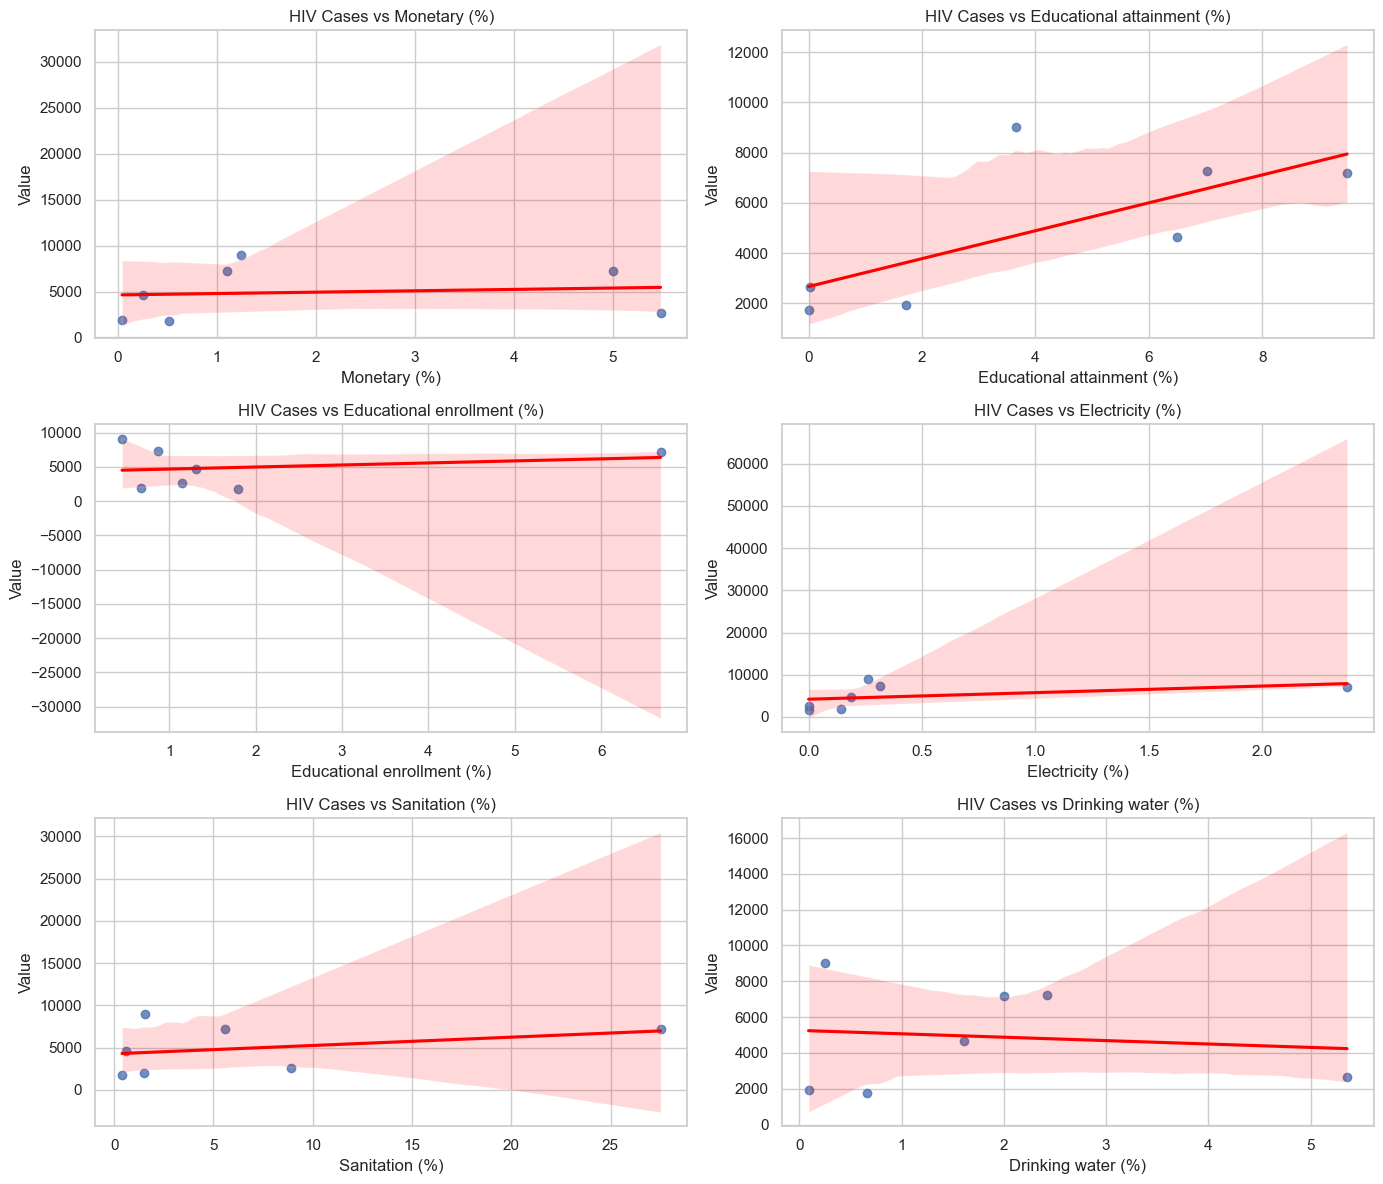

In [ ]:
#plotting regression results for each model factor
# Scatter plot of HIV cases vs each of the factors with a regression line
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# List of columns to plot against HIV cases
factors = ['Monetary (%)', 'Educational attainment (%)', 'Educational enrollment (%)',
           'Electricity (%)', 'Sanitation (%)', 'Drinking water (%)']

for i, factor in enumerate(factors):
    row = i // 2
    col = i % 2
    sns.regplot(x=factor, y='Value', data=merged_df, ax=ax[row, col], line_kws={"color": "red"})
    ax[row, col].set_title(f'HIV Cases vs {factor}')

plt.tight_layout()
plt.show()


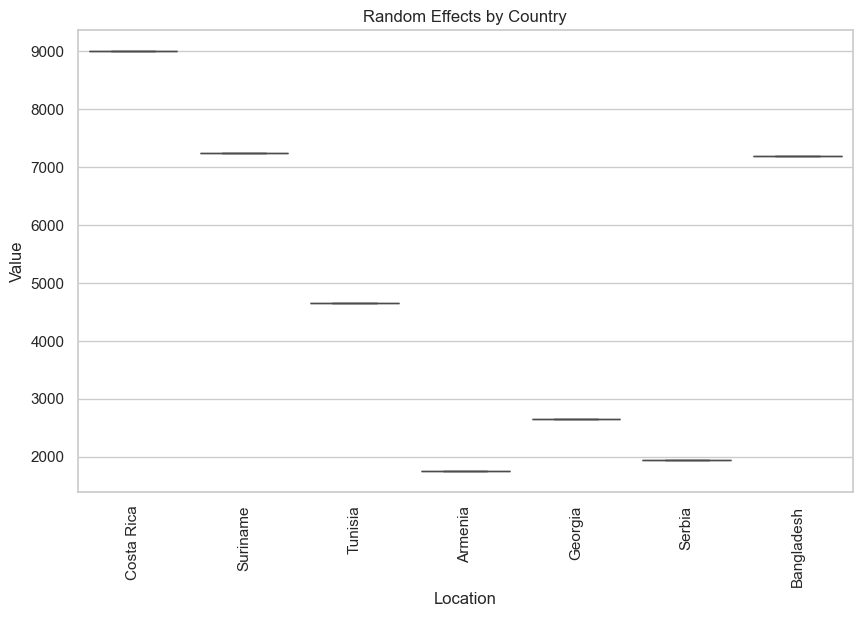

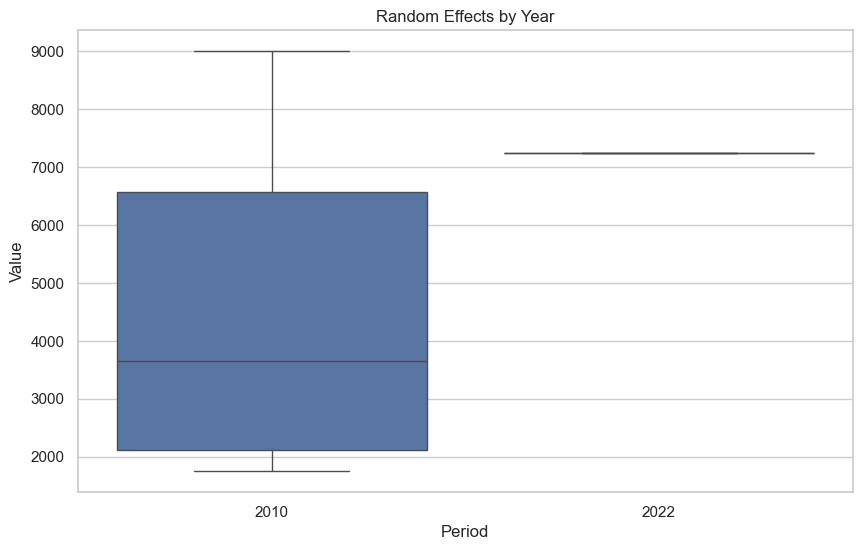

In [ ]:
#plotting random effects to explain variability
# Plot random effects for Location (country) and Period (year)
random_effects = mdf.random_effects

# Create a plot for random effects by country
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Value', data=merged_df)
plt.title('Random Effects by Country')
plt.xticks(rotation=90)
plt.show()

# Plot random effects by year (Period)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Value', data=merged_df)
plt.title('Random Effects by Year')
plt.show()


Findings Paragraph:

Poverty increases HIV risk, but mainly through specific problems like poor education rather than just "being poor." Some poverty factors might not affect HIV much, and a few might even show opposite patterns. The strongest, clearest link is between low education and higher HIV cases.
The data reveals strong correlations between HIV prevalence and multidimensional poverty, particularly with educational attainment (r=0.71) and electricity access (r=0.45). Lower monetary resources (−3917 coefficient) and sanitation (−2029) worsen poverty among HIV-affected populations. Random effects show minimal country/year variance, suggesting systemic drivers dominate. Outliers in sanitation and drinking water indicate regional disparities needing targeted intervention.
Policies should prioritize integrated HIV-poverty programs, focusing on education and infrastructure (electricity/sanitation). Strengthening economic support and healthcare access can mitigate poverty linkages. Regional outliers highlight the need for localized solutions.Since country/year differences are small, big-picture changes (not just local ones) will work best to break the HIV-poverty connection.




QUESTION TWO

In [ ]:
#Importing the neonatal dataset

df3=pd.read_csv(r"C:\Users\ACHI\Downloads\CEMA\dataset_datascience.csv")

In [ ]:
#checking the structure of the neonatal dataset
df3.head(3)

,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval
0,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,1995.5,47.869030,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
1,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2000.5,35.349317,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
2,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2005.5,27.699219,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0


In [ ]:
#checking the columns of the dataset


df3.columns

Index(['REF_AREA', 'Geographic area', 'Regional group', 'Indicator', 'Sex',
       'Wealth Quintile', 'Series Name', 'Series Year', 'Reference Date',
       'Observation Value', 'Lower Bound', 'Upper Bound', 'Standard Error',
       'Country notes', 'Observation Status', 'Unit of measure', 'Series Type',
       'Series Category', 'Series Method', 'Age Group of Women',
       'Time Since First Birth', 'Definition', 'Interval'],
      dtype='object')

In [ ]:
## 2. Filter for East African Community (EAC) countries
eac_countries = [
    "Burundi", "Democratic Republic of the Congo", "Kenya",
    "Rwanda", "Somalia", "South Sudan", "Uganda", "Tanzania"
]
df_eac = df3[df3['Geographic area'].isin(eac_countries)]

In [ ]:
#checking the structure of the new eac countries dataframe
df_eac.head(5)

,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval
6387,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,1993.5,36.41348,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
6388,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,1998.5,41.25996,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
6389,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2003.5,32.83915,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
6390,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2008.5,28.46557,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
6391,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),2016-2017,2013.5,23.70623,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0


In [ ]:
df_eac['Reference Date'].unique()

array([1993.5, 1998.5, 2003.5, 2008.5, 2013.5, 1987.5, 1992.5, 1997.5,
       2002.5, 2007.5, 1964.5, 1969.5, 1974.5, 1979.5, 1984.5, 1965.5,
       1966.5, 1967.5, 1968.5, 1970.5, 1971.5, 1972.5, 1973.5, 1975.5,
       1976.5, 1977.5, 1978.5, 1980.5, 1981.5, 1982.5, 1983.5, 1985.5,
       1986.5, 1988.5, 1989.5, 1990.5, 1991.5, 1994.5, 1995.5, 1996.5,
       1999.5, 2000.5, 2001.5, 2004.5, 2005.5, 2006.5, 2009.5, 2010.5,
       2011.5, 2012.5, 2014.5, 2015.5, 2016.5, 2017.5, 2018.5, 2019.5,
       2020.5, 2021.5, 2022.5, 2023.5, 1989.1, 1993.6, 1995.7, 1998.2,
       2001.6, 2003.9, 2005.1, 2006. , 2007. , 2008.3, 1993.2, 1996.3,
       1999. , 1989.2, 1995.8, 1995. , 1997.9, 2000.6, 2002.9, 2005. ,
       2006.6, 2008.2, 1977.2, 1980.2, 1982.8, 1985.2, 1987.2, 1988.8,
       1969. , 1971. , 1973. , 1975. , 1977. , 1979. , 1981. , 1983. ,
       1985. , 1974.4, 1977.3, 1979.9, 1982.2, 1984.2, 1985.7, 1966.8,
       1969.7, 1972.2, 1976.4, 1977.9, 1959.2, 1961.8, 1963.6, 1965.1,
      

In [ ]:
df_eac.columns

Index(['REF_AREA', 'Geographic area', 'Regional group', 'Indicator', 'Sex',
       'Wealth Quintile', 'Series Name', 'Series Year', 'Reference Date',
       'Observation Value', 'Lower Bound', 'Upper Bound', 'Standard Error',
       'Country notes', 'Observation Status', 'Unit of measure', 'Series Type',
       'Series Category', 'Series Method', 'Age Group of Women',
       'Time Since First Birth', 'Definition', 'Interval'],
      dtype='object')

In [ ]:
#checking the unique data in geographic area column
df_eac['Geographic area'].unique()  #tanzania is missing from the dataset hence we will only analyze data for the seven countries

array(['Burundi', 'Democratic Republic of the Congo', 'Kenya', 'Rwanda',
       'Somalia', 'South Sudan', 'Uganda'], dtype=object)

In [ ]:
# SPLIT first
neonatal = df_eac[df_eac['Indicator'].str.contains('Neonatal', case=False, na=False)]
underfive = df_eac[df_eac['Indicator'].str.contains('Under-five', case=False, na=False)]


In [ ]:
# For neonatal
neonatal['Year'] = neonatal['Reference Date'].round().astype(int)
latest_neonatal = neonatal.sort_values('Year', ascending=False).drop_duplicates('Geographic area', keep='first')


In [ ]:
# For under-five
underfive['Year'] = underfive['Reference Date'].round().astype(int)
latest_underfive = underfive.sort_values('Year', ascending=False).drop_duplicates('Geographic area', keep='first')


In [ ]:
#installing geopandas
!pip install geopandas

In [ ]:

import geopandas as gpd

# Load ONLY level 0
burundi = gpd.read_file(r"C:\Users\ACHI\Downloads\gadm41_BDI_shp\gadm41_BDI_0.shp")
drc = gpd.read_file(r"C:\Users\ACHI\Downloads\gadm41_COD_shp\gadm41_COD_0.shp")
rwanda = gpd.read_file(r"C:\Users\ACHI\Downloads\gadm41_RWA_shp\gadm41_RWA_0.shp")
somalia = gpd.read_file(r"C:\Users\ACHI\Downloads\gadm41_SOM_shp\gadm41_SOM_0.shp")
south_sudan = gpd.read_file(r"C:\Users\ACHI\Downloads\gadm41_SSD_shp\gadm41_SSD_0.shp")
uganda = gpd.read_file(r"C:\Users\ACHI\Downloads\gadm41_UGA_shp\gadm41_UGA_0.shp")
kenya = gpd.read_file(r"C:\Users\ACHI\Downloads\gadm41_KEN_shp\gadm41_KEN_0.shp")

# Combine them together
eac_countries = gpd.GeoDataFrame(pd.concat([burundi, drc, rwanda, somalia, south_sudan, uganda, kenya], ignore_index=True))



In [ ]:
#checking the structure of the combined shapefiles
eac_countries.head(3)

,GID_0,COUNTRY,geometry
0,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,..."
1,COD,Democratic Republic of the Congo,"MULTIPOLYGON (((27.24913 -11.79462, 27.2478 -1..."
2,RWA,Rwanda,"POLYGON ((29.71332 -2.81759, 29.71295 -2.81774..."


In [ ]:
#checking unique countries
eac_countries['COUNTRY'].unique()

array(['Burundi', 'Democratic Republic of the Congo', 'Rwanda', 'Somalia',
       'South Sudan', 'Uganda', 'Kenya'], dtype=object)

In [ ]:
# Merge neonatal with shapefile
merged_neonatal = eac_countries.merge(latest_neonatal, left_on='COUNTRY', right_on='Geographic area')

# Merge under-five with shapefile
merged_underfive = eac_countries.merge(latest_underfive, left_on='COUNTRY', right_on='Geographic area')


In [ ]:
#checking the merged neonatal dataframe
merged_neonatal.head(5)

,GID_0,COUNTRY,geometry,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,...,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval,Year
0,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024
1,COD,Democratic Republic of the Congo,"MULTIPOLYGON (((27.24913 -11.79462, 27.2478 -1...",COD,Democratic Republic of the Congo,NaN,Neonatal mortality rate,Total,Total,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024
2,RWA,Rwanda,"POLYGON ((29.71332 -2.81759, 29.71295 -2.81774...",RWA,Rwanda,NaN,Neonatal mortality rate,Total,Total,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024
3,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,NaN,Neonatal mortality rate,Total,Total,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024
4,SSD,South Sudan,"POLYGON ((29.79568 4.3843, 29.79645 4.38899, 2...",SSD,South Sudan,NaN,Neonatal mortality rate,Total,Total,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024


In [ ]:
#checking the merged underfive dataframe
merged_underfive.head(5)

,GID_0,COUNTRY,geometry,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,...,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval,Year
0,BDI,Burundi,"POLYGON ((30.04515 -4.25684, 30.04523 -4.2576,...",BDI,Burundi,NaN,Under-five mortality rate,Total,Highest,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024
1,COD,Democratic Republic of the Congo,"MULTIPOLYGON (((27.24913 -11.79462, 27.2478 -1...",COD,Democratic Republic of the Congo,NaN,Under-five mortality rate,Total,Total,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024
2,RWA,Rwanda,"POLYGON ((29.71332 -2.81759, 29.71295 -2.81774...",RWA,Rwanda,NaN,Under-five mortality rate,Total,Middle,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024
3,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",SOM,Somalia,NaN,Under-five mortality rate,Total,Second,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024
4,SSD,South Sudan,"POLYGON ((29.79568 4.3843, 29.79645 4.38899, 2...",SSD,South Sudan,NaN,Under-five mortality rate,Female,Total,UN IGME estimate,...,Normal value,"Deaths per 1,000 live births",NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024


In [ ]:
#Trend of Neonatal Mortality Rates over time

# Neonatal average trend
average_trend_neonatal = merged_neonatal.groupby('Reference Date')['Observation Value'].mean().reset_index()




In [ ]:
#Trend of Under-five mortality rates over time
# Under-five average trend
average_trend_under_five = merged_underfive.groupby('Reference Date')['Observation Value'].mean().reset_index()

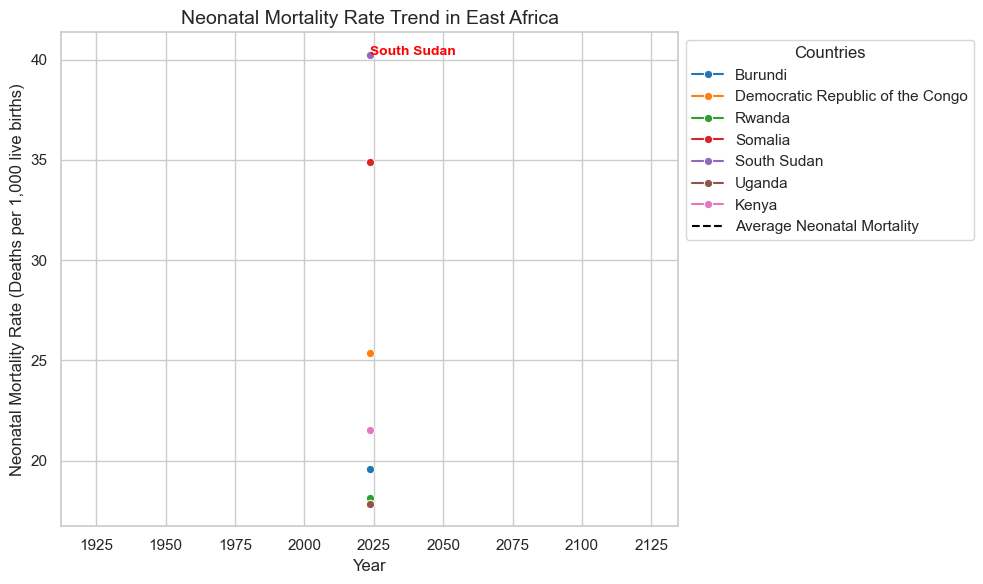

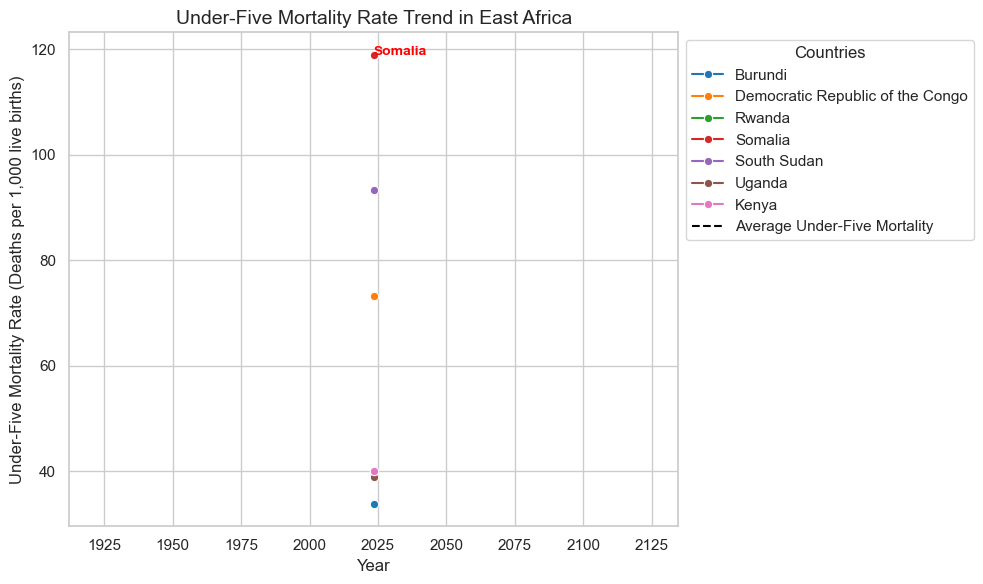

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a style for the plots
sns.set(style="whitegrid")

# Neonatal Mortality - Plotting the Average Trend Line and Points for Each Country
plt.figure(figsize=(10, 6))

# Group by country and plot average trends for each country (Neonatal Mortality)
sns.lineplot(data=merged_neonatal, x='Reference Date', y='Observation Value',
             hue='Geographic area', marker='o', ci=None, palette='tab10')

# Add average trend line (overall mean across all countries for neonatal mortality)
average_neonatal = merged_neonatal.groupby('Reference Date')['Observation Value'].mean()
plt.plot(average_neonatal.index, average_neonatal.values, color='black', linestyle='--', label='Average Neonatal Mortality')

# Add titles and labels
plt.title('Neonatal Mortality Rate Trend in East Africa', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Neonatal Mortality Rate (Deaths per 1,000 live births)', fontsize=12)

# Highlight the highest neonatal mortality rate country by adding a text label
highest_neonatal_country = merged_neonatal.loc[merged_neonatal['Observation Value'].idxmax()]
plt.text(highest_neonatal_country['Reference Date'], highest_neonatal_country['Observation Value'],
         highest_neonatal_country['Geographic area'], fontsize=10, fontweight='bold', color='red')

# Show legend and plot
plt.legend(title='Countries', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# Under-Five Mortality - Plotting the Average Trend Line and Points for Each Country
plt.figure(figsize=(10, 6))

# Group by country and plot average trends for each country (Under-Five Mortality)
sns.lineplot(data=merged_underfive, x='Reference Date', y='Observation Value',
             hue='Geographic area', marker='o', ci=None, palette='tab10')

# Add average trend line (overall mean across all countries for under-five mortality)
average_under_five = merged_underfive.groupby('Reference Date')['Observation Value'].mean()
plt.plot(average_under_five.index, average_under_five.values, color='black', linestyle='--', label='Average Under-Five Mortality')

# Add titles and labels
plt.title('Under-Five Mortality Rate Trend in East Africa', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Under-Five Mortality Rate (Deaths per 1,000 live births)', fontsize=12)

# Highlight the highest under-five mortality rate country by adding a text label
highest_under_five_country = merged_underfive.loc[merged_underfive['Observation Value'].idxmax()]
plt.text(highest_under_five_country['Reference Date'], highest_under_five_country['Observation Value'],
         highest_under_five_country['Geographic area'], fontsize=10, fontweight='bold', color='red')

# Show legend and plot
plt.legend(title='Countries', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


South Sudan has the highest Neonatal Mortality Rate in East Africa while Somalia has the Highest Under five Mortality Rate in East Africa

In [ ]:
# Find latest year for neonatal and under-five separately
latest_year_neonatal = merged_neonatal['Reference Date'].max()
latest_year_underfive = merged_underfive['Reference Date'].max()

# Filter for latest year
latest_neonatal = merged_neonatal[merged_neonatal['Reference Date'] == latest_year_neonatal]
latest_underfive = merged_underfive[merged_underfive['Reference Date'] == latest_year_underfive]

# Find the country with the highest neonatal mortality
highest_neonatal = latest_neonatal.loc[latest_neonatal['Observation Value'].idxmax()]
print(f"Highest Neonatal Mortality: {highest_neonatal['Geographic area']} ({highest_neonatal['Observation Value']:.2f} deaths per 1,000 live births)")

# Find the country with the highest under-five mortality
highest_underfive = latest_underfive.loc[latest_underfive['Observation Value'].idxmax()]
print(f"Highest Under-Five Mortality: {highest_underfive['Geographic area']} ({highest_underfive['Observation Value']:.2f} deaths per 1,000 live births)")


Highest Neonatal Mortality: South Sudan (40.24 deaths per 1,000 live births)
Highest Under-Five Mortality: Somalia (118.94 deaths per 1,000 live births)


Code to confirm the visual observations above which affirms South Sudan as the country with the highest neonatal mortality
rate and Somalia with the highest under-five mortality rate.
It is, therefore, important to conduct further analysis to find the key factors that have led to high mortality rates in those countries and
also, mitigation solutions should get introduced in those countries to ensure new borns have improved chances of survival.